In [1]:
import sys
import os
import pickle

library_path = os.path.join('..', '..', 'UCB-USACE-LSTMs')
sys.path.insert(0, library_path)

from pathlib import Path
import pandas as pd

import matplotlib.pyplot as plt
import torch
from neuralhydrology.evaluation.metrics import *
from neuralhydrology.nh_run import start_run, eval_run, finetune
from neuralhydrology.utils.nh_results_ensemble import create_results_ensemble
from neuralhydrology.UCB_training.UCB_train import UCB_trainer
from neuralhydrology.evaluation.metrics import calculate_all_metrics

Quick check that working directory and train basin file exists:

In [2]:
print("Current Working Directory:", os.getcwd())
print("Train Basin File Exists:", os.path.exists("warms springs"))

Current Working Directory: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all
Train Basin File Exists: False


In [3]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
params = {
    "epochs":32
}
lstmNoPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params)

In [4]:
lstmNoPhysics.train()

2024-11-30 09:59:16,629: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3011_095916/output.log initialized.
2024-11-30 09:59:16,676: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3011_095916
2024-11-30 09:59:16,684: ### Run configurations for testing_run
2024-11-30 09:59:16,688: experiment_name: testing_run
2024-11-30 09:59:16,691: train_basin_file: warm springs
2024-11-30 09:59:16,695: validation_basin_file: warm springs
2024-11-30 09:59:16,706: test_basin_file: warm springs
2024-11-30 09:59:16,710: train_start_date: 1994-10-01 00:00:00
2024-11-30 09:59:16,716: train_end_date: 2002-09-30 00:00:00
2024-11-30 09:59:16,719: validation_start_date: 2002-10-01 00:00:00
2024-11-30 09:59:16,722: validation_end_date: 2005-09-30 00:00:00
2024-11-30 09:59:16,724: test_start_date: 2005-10-01 00:00:00
2024-11-30 09:59:16,726: test_end_date: 2009-09-30 00:00:00
2024-11-30 09:59:

Using basin: Warm Springs
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


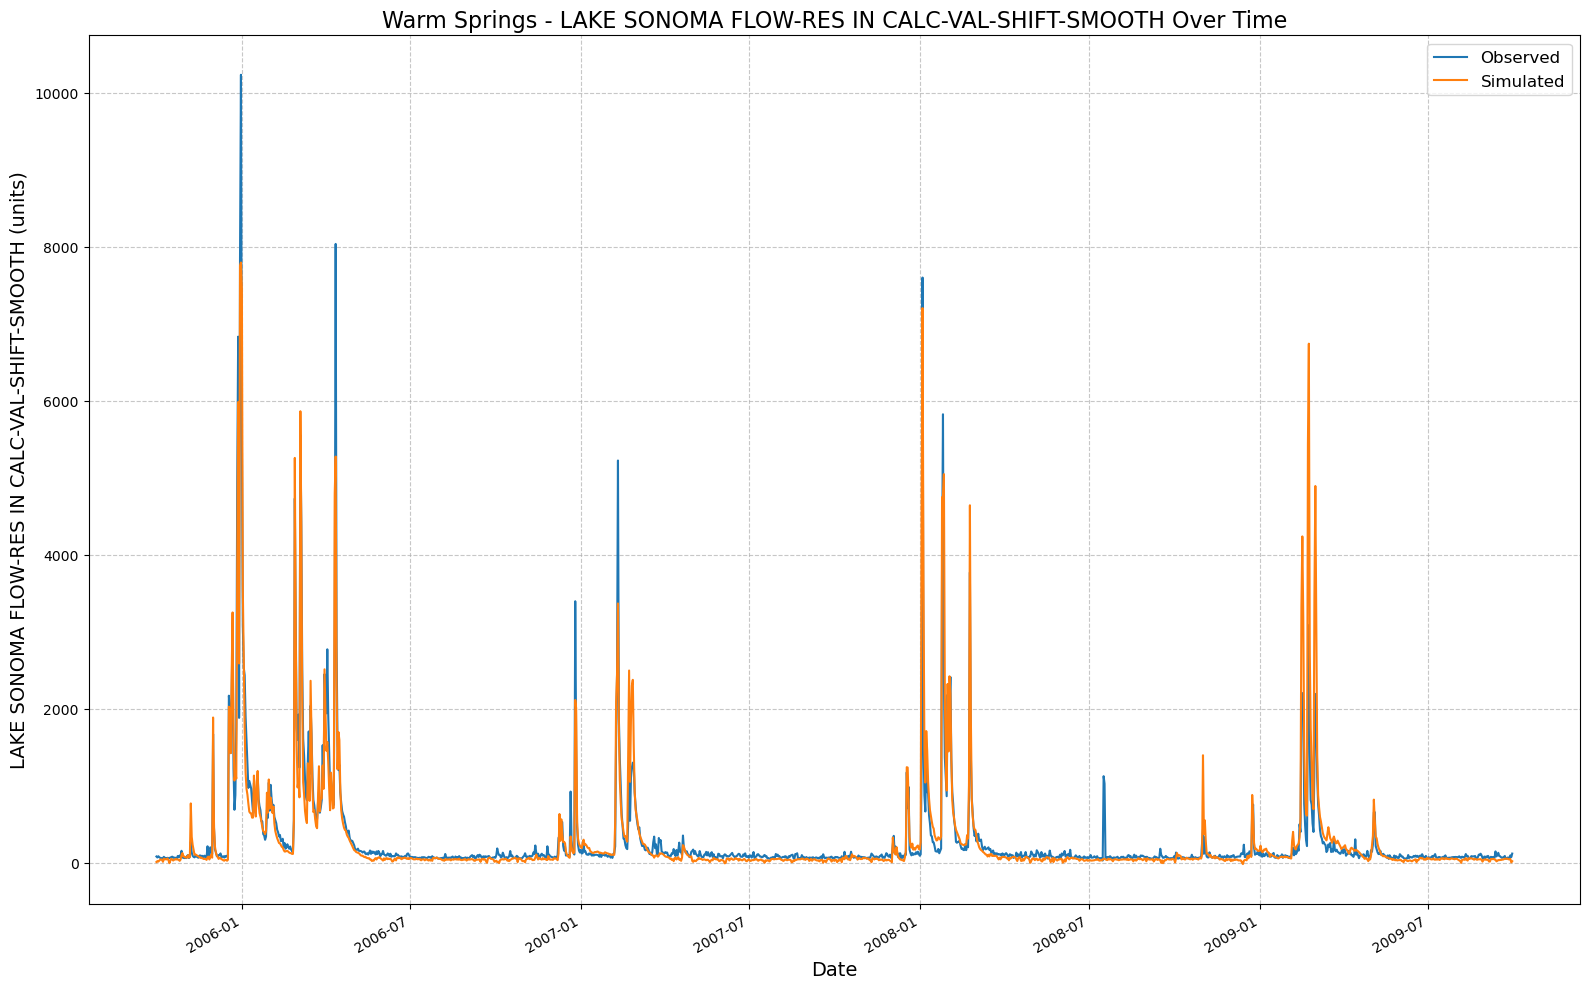

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3011_095916/results_output.csv


{'NSE': 0.8344656527042389,
 'MSE': 88586.4453125,
 'RMSE': 297.63475152021476,
 'KGE': 0.898179828984639,
 'Alpha-NSE': 1.0681989277298531,
 'Beta-KGE': 0.9932306408882141,
 'Beta-NSE': -0.0027530121773638515,
 'Pearson-r': 0.9246977473158252,
 'FHV': 11.391755193471909,
 'FMS': 68.67067309916244,
 'FLV': -2105.5680944589226,
 'Peak-Timing': 0.16666666666666666,
 'Peak-MAPE': 52.174814542134605}

In [5]:
lstmNoPhysics.results()

Now run physics informed lstm with HMS data:

In [ ]:
path_to_csv = Path("/Users/mia/research/russian_river_data_folder/")
path_to_yaml = Path("warm_springs_dam.yaml")
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/Warm Spring.csv")
params = {
    "epochs":6
}
features_with_physics = [
    #from daily.csv
    "DRY CREEK 20 PRECIP-INC SCREENED",
    "DRY CREEK 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 30 PRECIP-INC SCREENED",
    "DRY CREEK 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    #from Warm_Spring_Inflow.csv
    'Warm Springs Dam Inflow FLOW WarmSprings_Inflow',
    'Dry Creek 20 ET-POTENTIAL WarmSprings_Inflow',
    'Dry Creek 20 FLOW WarmSprings_Inflow',
    'Dry Creek 20 FLOW-BASE WarmSprings_Inflow',
    'Dry Creek 20 INFILTRATION WarmSprings_Inflow',
    'Dry Creek 20 PERC-SOIL WarmSprings_Inflow',
    'Dry Creek 20 SATURATION FRACTION WarmSprings_Inflow',
    'Dry Creek 30 ET-POTENTIAL WarmSprings_Inflow',
    'Dry Creek 30 FLOW WarmSprings_Inflow',
    'Dry Creek 30 FLOW-BASE WarmSprings_Inflow',
    'Dry Creek 30 INFILTRATION WarmSprings_Inflow',
    'Dry Creek 30 PERC-SOIL WarmSprings_Inflow',
    'Dry Creek 30 SATURATION FRACTION WarmSprings_Inflow',
    ]
lstmPhysics = UCB_trainer(path_to_csv, yaml_path= path_to_yaml, hyperparams= params, input_features= features_with_physics, physics_informed=True, physics_data_file=path_to_physics_data)

In [19]:
lstmPhysics.train()

2024-11-30 10:48:52,976: Logging to /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3011_104852/output.log initialized.
2024-11-30 10:48:52,979: ### Folder structure created at /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3011_104852
2024-11-30 10:48:52,979: ### Run configurations for testing_run
2024-11-30 10:48:53,028: experiment_name: testing_run
2024-11-30 10:48:53,033: train_basin_file: warm springs
2024-11-30 10:48:53,035: validation_basin_file: warm springs
2024-11-30 10:48:53,038: test_basin_file: warm springs
2024-11-30 10:48:53,040: train_start_date: 1994-10-01 00:00:00
2024-11-30 10:48:53,041: train_end_date: 2002-09-30 00:00:00
2024-11-30 10:48:53,044: validation_start_date: 2002-10-01 00:00:00
2024-11-30 10:48:53,046: validation_end_date: 2005-09-30 00:00:00
2024-11-30 10:48:53,047: test_start_date: 2005-10-01 00:00:00
2024-11-30 10:48:53,049: test_end_date: 2009-09-30 00:00:00
2024-11-30 10:48:

ValueError: could not convert string to float: ''

Using basin: Guerneville
Using target variable: LAKE SONOMA FLOW-RES IN CALC-VAL-SHIFT-SMOOTH


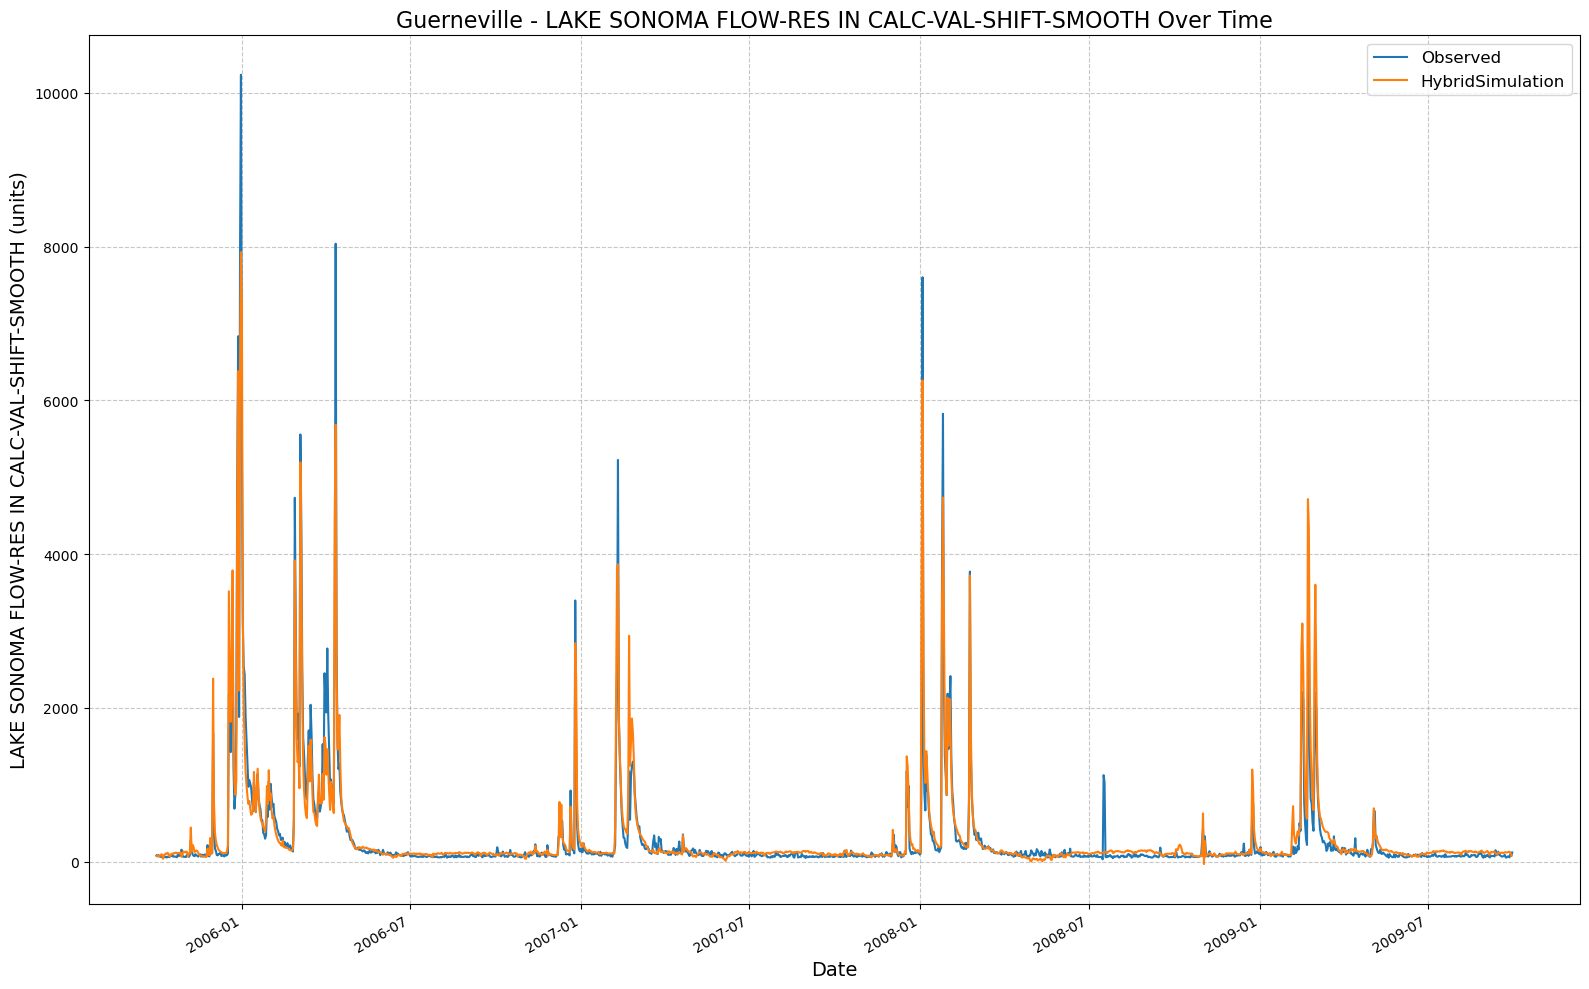

[INFO] CSV output saved at: /Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_090419/results_output.csv


{'NSE': 0.901990532875061,
 'MSE': 52484.01171875,
 'RMSE': 229.09389280107402,
 'KGE': 0.8958314725713269,
 'Alpha-NSE': 0.9601634301992391,
 'Beta-KGE': 1.0824707746505737,
 'Beta-NSE': 0.033542625477492274,
 'Pearson-r': 0.9503743902636793,
 'FHV': -0.1440407824702561,
 'FMS': -20.426933790519872,
 'FLV': -2267.4208135660674,
 'Peak-Timing': 0.3333333333333333,
 'Peak-MAPE': 37.5429630279541}

In [12]:
lstmPhysics.results()

Now, combine the results for the normal lstm, physics informed lstm and the hms results on one graph over a specified time period (the test period).

In [13]:
def combinedPlot(lstm_results: Path, lstmPhysics_results: Path, HMS_results: Path, title: str, 
                 test_start_date="01/10/2005", test_end_date="30/09/2009"):
    model1_df = pd.read_csv(lstm_results) #colums: Date, Observed, Predicted
    model2_df = pd.read_csv(lstmPhysics_results) #colums: Date, Observed, Predicted
    model1_df = model1_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model1',
        'Predicted': 'Predicted_Model1'
    })
    model1_df['date'] = pd.to_datetime(model1_df['date'])

    model2_df = model2_df.rename(columns={
        'Date': 'date',
        'Observed': 'Observed_Model2',
        'Predicted': 'Predicted_Model2'
    })
    model2_df['date'] = pd.to_datetime(model2_df['date'])

    hms_df = pd.read_csv(HMS_results)
    hms_df = hms_df[3:]
    hms_df.columns = hms_df.columns.str.strip()
    hms_df = hms_df.drop(columns=['Ordinate'])
    hms_df = hms_df.rename(columns={'Date / Time': 'date'})
    hms_df['date'] = pd.to_datetime(hms_df['date'], format='%d-%b-%y')
    hms_df = hms_df.reset_index(drop=True)
    hms_df = hms_df.iloc[:, [0,1]] #Date, HMS predicted
    hms_df = hms_df.rename(columns={hms_df.columns[1]: "HMS_predicted"})
    hms_df["HMS_predicted"] = pd.to_numeric(hms_df["HMS_predicted"], errors="coerce")

    df = model1_df.merge(model2_df, how='right', on='date').merge(hms_df, how='right', on='date')

    # Filter for the test period
    test_start_date = pd.to_datetime("2005-10-01")
    test_end_date = pd.to_datetime("2009-09-30")
    df = df[(df['date'] >= test_start_date) & (df['date'] <= test_end_date)]

    # Plot all columns against the "date_col" (x-axis)
    plt.figure(figsize=(30, 10))
    
    plt.plot(df["date"], df["Observed_Model1"], label='Observed', color="blue", linewidth=1.5)
    plt.plot(df["date"], df["Predicted_Model1"], label='LSTM Prediction', color="purple", linewidth=1.5, alpha=0.8)
    plt.plot(df["date"], df["Predicted_Model2"], label='Physics Informed LSTM Prediction', color="orange", linewidth=1.5, alpha=0.8)
    plt.plot(df["date"], df["HMS_predicted"], label='HMS Prediction', color="lightblue", linewidth=1.2, alpha=0.6)

    # Customize the plot
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Inflow (cubic feet per second)", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(fontsize=10, loc="upper right")
    plt.grid(True, alpha=0.4)

    #plt.gcf.autofmt_xdate()
    plt.tight_layout()
    plt.show()

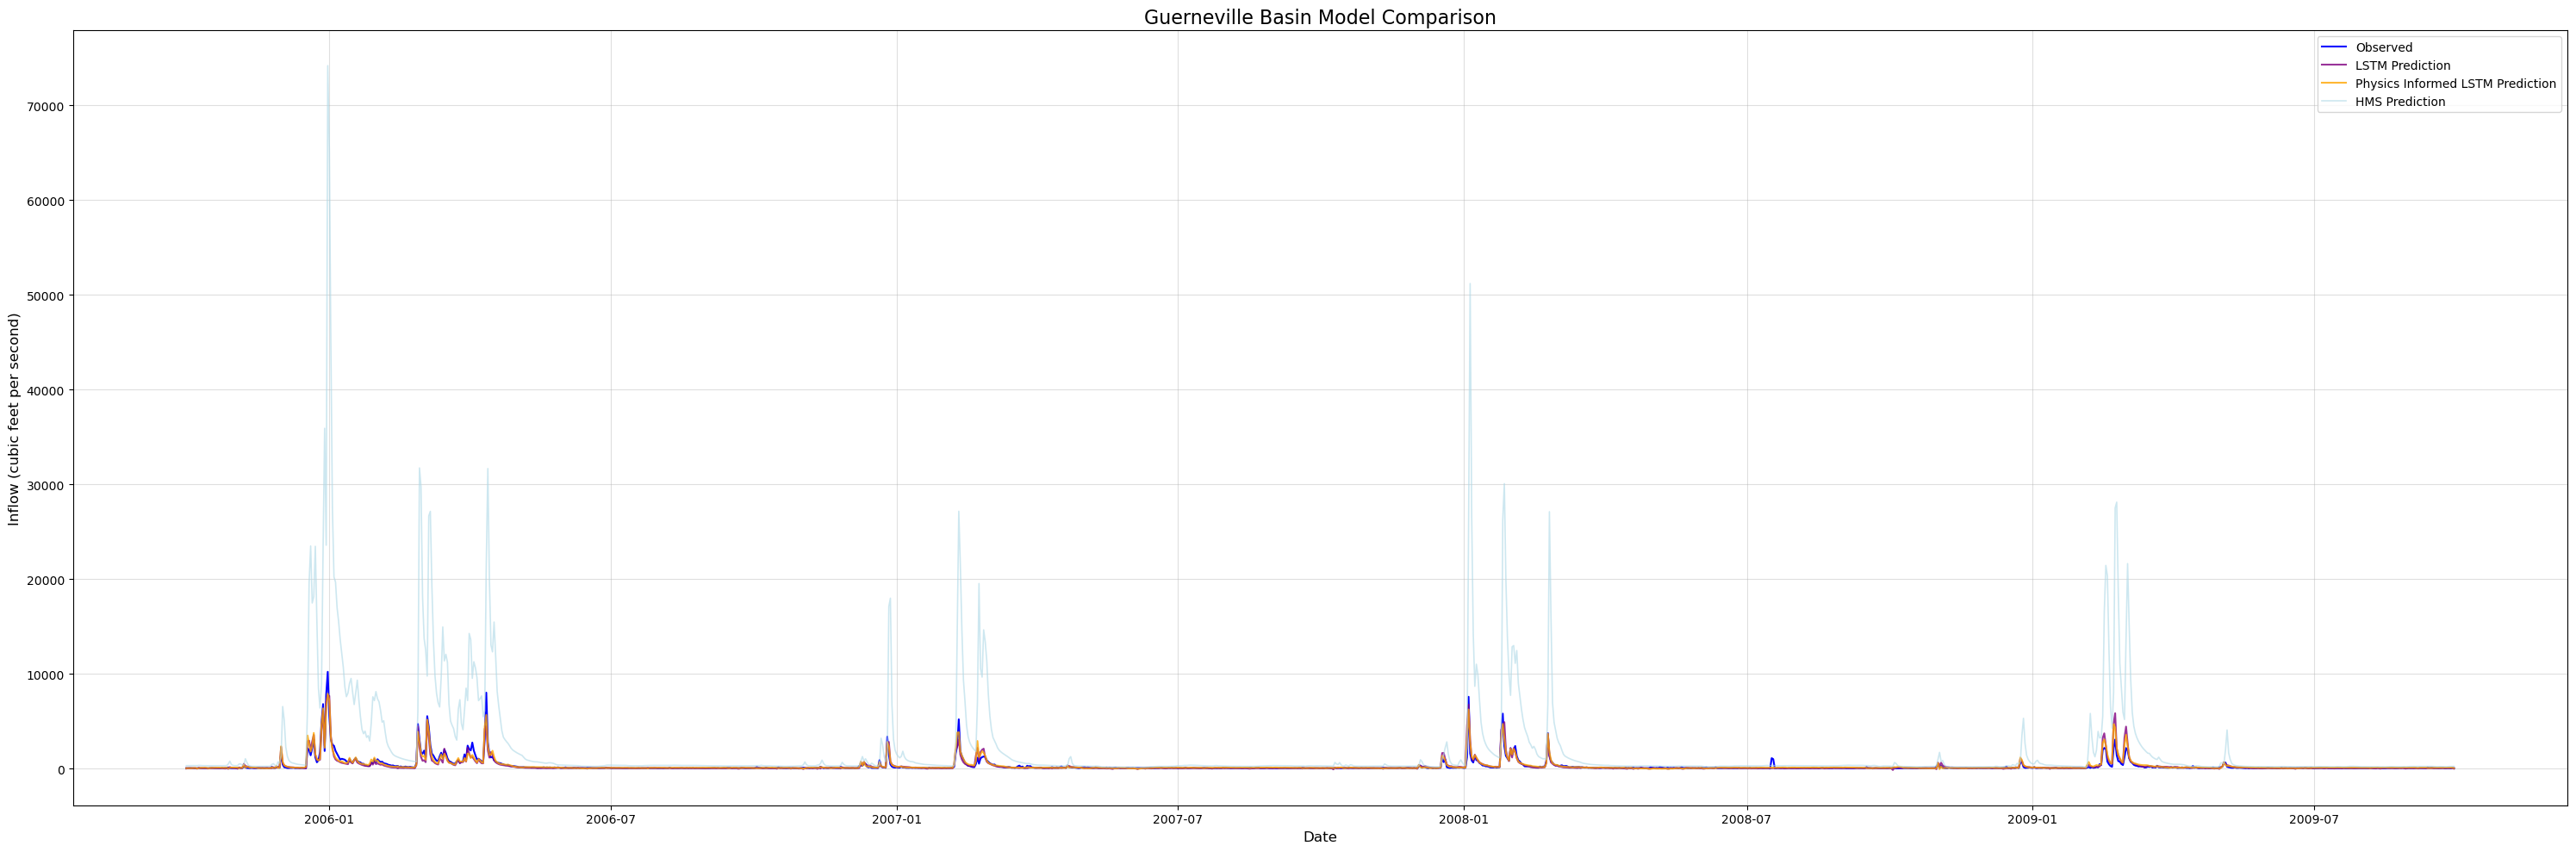

In [ ]:
#change the paths to the respective ouptut csvs from running.result()
lstm_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/warm_springs_all/runs/testing_run_3011_095916/results_output.csv')
physics_informed_result_path = Path('/Users/mia/research/UCB-USACE-LSTMs/neuralhydrology/guerneville_all/runs/testing_run_3011_090419/results_output.csv')
path_to_physics_data = Path("/Users/mia/research/russian_river_data_folder/guerneville.csv")
combinedPlot(lstm_results=lstm_result_path, lstmPhysics_results= physics_informed_result_path, HMS_results=path_to_physics_data, title='Guerneville Basin Model Comparison')